# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
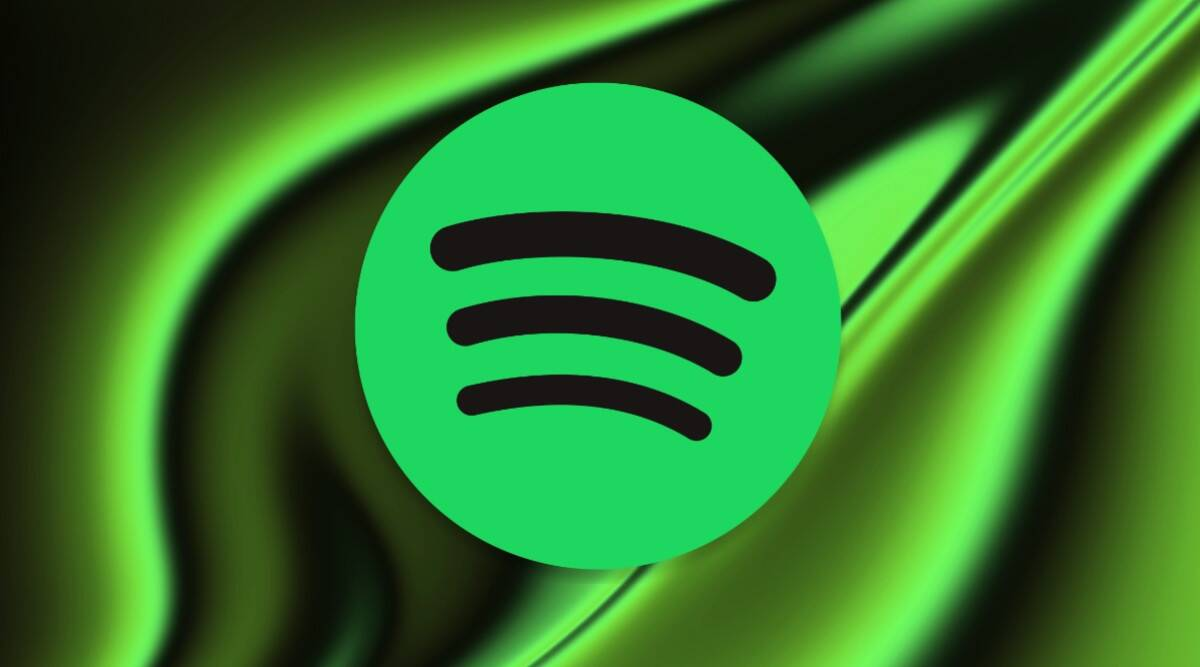
</div>

# Import Libraries

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 

In [41]:
%pwd

'd:\\uni\\DM\\DM_Project'

# Load Spotify Dataset (CSV file)

In [42]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [43]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [44]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [45]:
# To be completed
number_of_songs = spotify_df.groupby("artist_name").count().sort_values('track_id', ascending=False)['track_id']
number_of_songs

artist_name
Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: track_id, Length: 69, dtype: int64

## Q: Get the average duration of songs by each of the artists in minutes

In [46]:
# To be completed
average_duration = spotify_df.groupby("artist_name")['duration_ms'].mean().apply(lambda x: x/60000)
average_duration.name = 'duration_min'
average_duration

artist_name
Abbas Ghaderi            5.074705
Abdolhosein Mokhtabad    6.228769
Afshin Moghaddam         4.100780
Ali Lohrasbi             3.602079
Ali Zand Vakili          4.854786
                           ...   
Siavash Ghomayshi        4.341582
Sirvan Khosravi          4.352529
Soheil Nafissi           3.063580
Tohi                     3.523408
Xaniar Khosravi          3.934065
Name: duration_min, Length: 69, dtype: float64

## Q: list of artist's unique names

In [47]:
spotify_df.groupby("artist_name").count().shape[0]

69

## Q: Plot average duration of tracks by year

C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\1128367574.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(spotify_df.groupby("album_release_year").mean().drop(0)['duration_ms'].apply(lambda x: x/6000))
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\1128367574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.xticks(spotify_df.groupby("album_release_year").mean().drop(0)['duration_ms'].apply(lambda x: x/6000).index)


Text(0.5, 1.0, 'duration process')

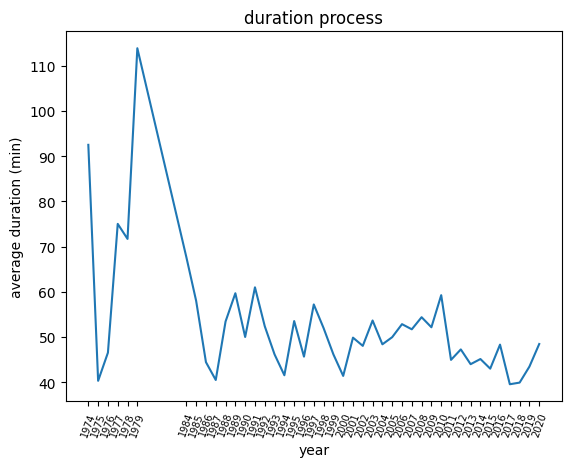

In [48]:
plt.plot(spotify_df.groupby("album_release_year").mean().drop(0)['duration_ms'].apply(lambda x: x/6000))
plt.ylabel('average duration (min)')
plt.xticks(rotation= 70, fontsize= 7)
plt.xticks(spotify_df.groupby("album_release_year").mean().drop(0)['duration_ms'].apply(lambda x: x/6000).index)
plt.xlabel("year")
plt.title("duration process")

## Q: Plot average loudness of tracks by year

C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2275785785.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(spotify_df.groupby("album_release_year").mean().drop(0)['loudness'])
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2275785785.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.xticks(spotify_df.groupby("album_release_year").mean().drop(0)['loudness'].index)


Text(0.5, 1.0, 'loudness process')

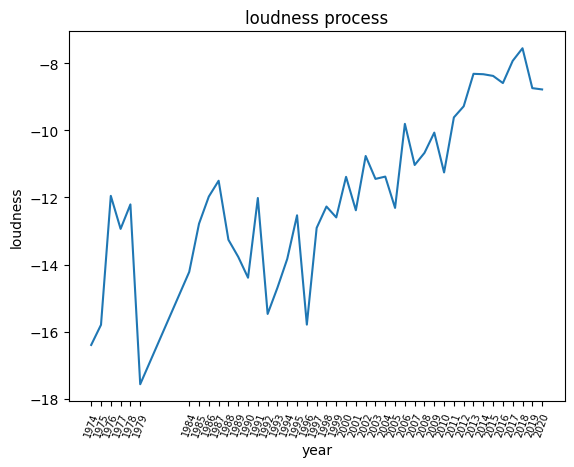

In [49]:
plt.plot(spotify_df.groupby("album_release_year").mean().drop(0)['loudness'])
plt.ylabel('loudness')
plt.xticks(rotation= 70, fontsize= 7)
plt.xticks(spotify_df.groupby("album_release_year").mean().drop(0)['loudness'].index)
plt.xlabel("year")
plt.title("loudness process")

## Q: Music attributes of songs over the years


C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2322093949.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(spotify_df.groupby("album_release_year").mean().drop(0)[target])
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2322093949.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.xticks(spotify_df.groupby("album_release_year").mean().drop(0)[target].index)
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2322093949.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeri

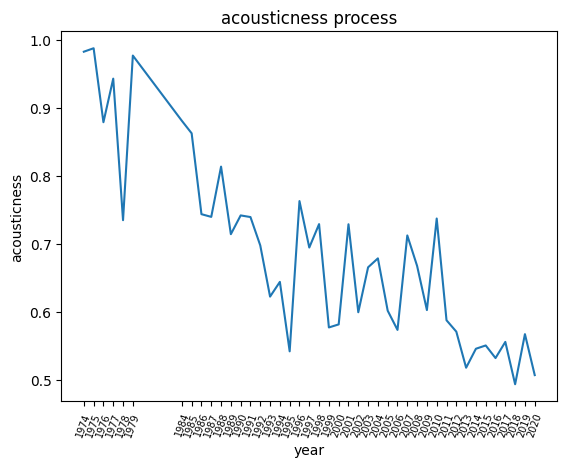

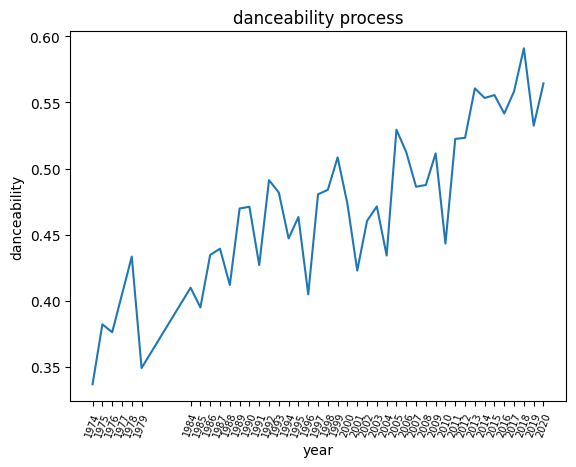

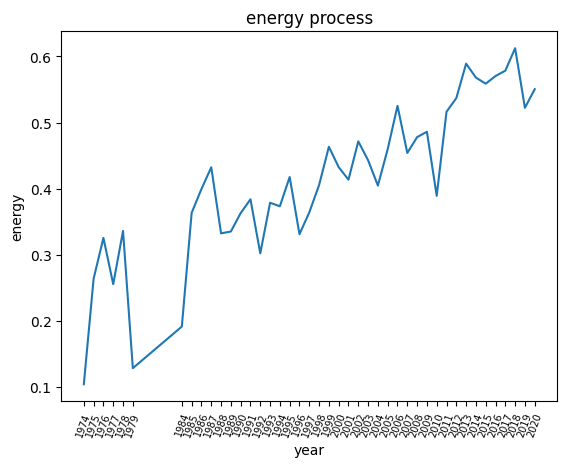

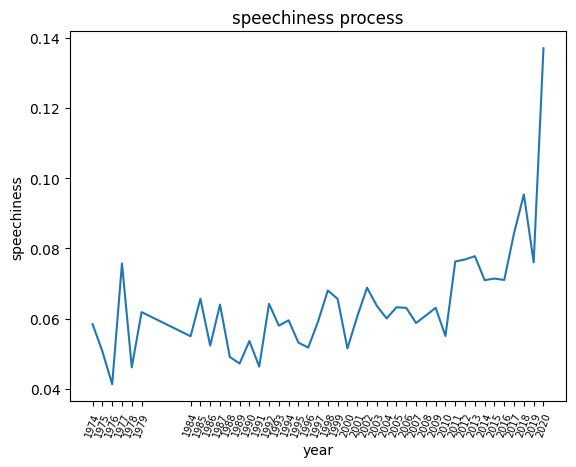

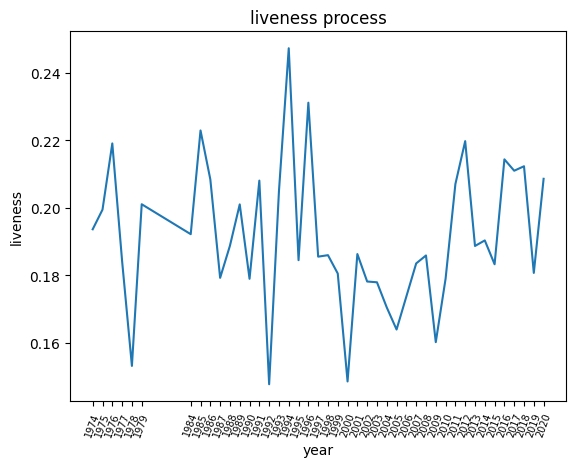

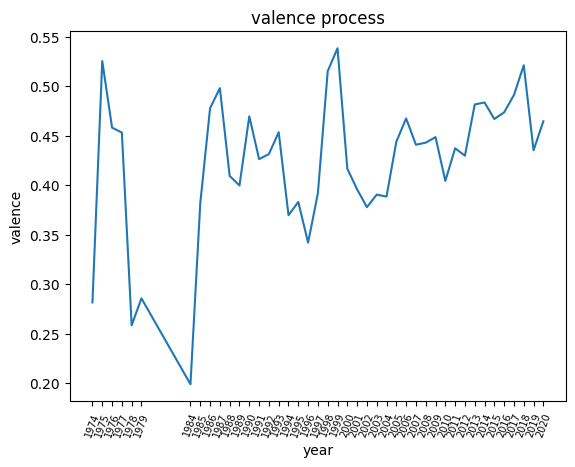

In [50]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

# To be completed
for target in target_cols:
    plt.figure()
    plt.plot(spotify_df.groupby("album_release_year").mean().drop(0)[target])
    plt.ylabel(target)
    plt.xticks(rotation= 70, fontsize= 7)
    plt.xticks(spotify_df.groupby("album_release_year").mean().drop(0)[target].index)
    plt.xlabel("year")
    plt.title(target+" process")

## Q: Plot top 10 popular tracks (Bar Chart)

C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\334769873.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10].index, spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10])
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\334769873.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10].index, spotify_df.groupby("artist_name").mean().sort_val

Text(0.5, 1.0, 'popular tracks')

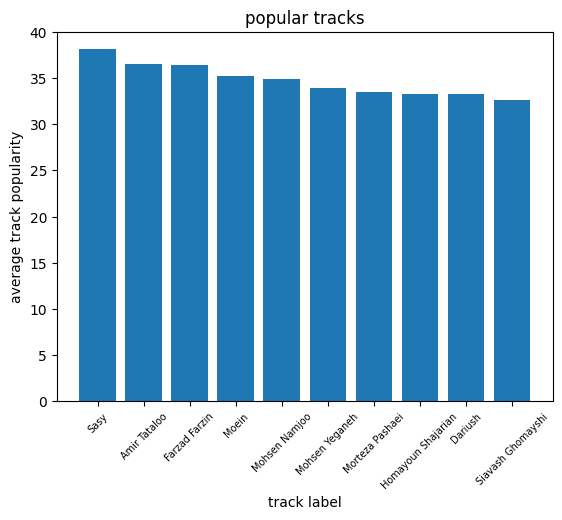

In [51]:
# To be completed
plt.bar(spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10].index, spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10])
plt.xticks(rotation= 45, fontsize=7)
plt.ylabel("average track popularity")
plt.xlabel("track label")
plt.title("popular tracks")


## Q: Plot top 10 popular artist (Bar Chart)

C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2255345390.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10].index, spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10])
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2255345390.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10].index, spotify_df.groupby("artist_name").mean().sort_v

Text(0.5, 1.0, 'popular artists')

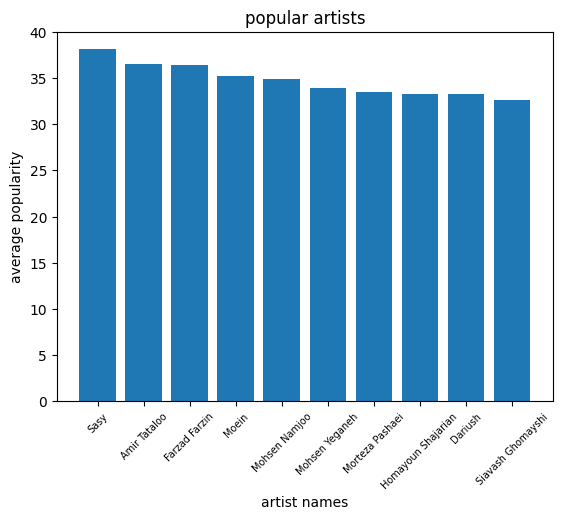

In [52]:
# To be completed
plt.bar(spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10].index, spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10])
plt.xticks(rotation= 45, fontsize=7)
plt.ylabel("average popularity")
plt.xlabel("artist names")
plt.title("popular artists")

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\1766209115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spotify_df.corr())


<AxesSubplot: >

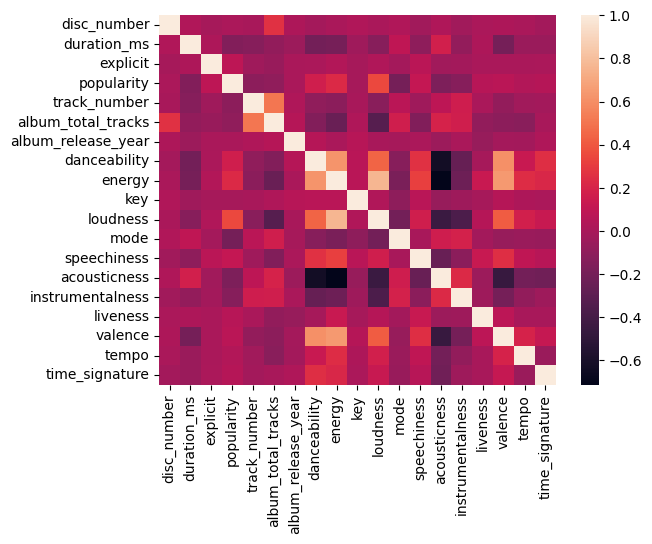

In [53]:
# To be completed
sns.heatmap(spotify_df.corr())

In [54]:
# To be completed
# spotify_df.corr()[spotify_df.corr()['duration_ms'] < 1]
print("the most correlated feature with 'duration_ms' is {} and it's correlation value is {}".format(spotify_df.corr()['duration_ms'].drop('duration_ms').idxmax(),
                                                                                                     spotify_df.corr()['duration_ms'].drop('duration_ms').max()))
print("the most correlated feature with 'popularity' is {} and it's correlation value is {}".format(spotify_df.corr()['popularity'].drop('popularity').idxmax(),
                                                                                                     spotify_df.corr()['popularity'].drop('popularity').max()))

the most correlated feature with 'duration_ms' is acousticness and it's correlation value is 0.17071279701216824
the most correlated feature with 'popularity' is loudness and it's correlation value is 0.345591360824764


C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\3709219285.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("the most correlated feature with 'duration_ms' is {} and it's correlation value is {}".format(spotify_df.corr()['duration_ms'].drop('duration_ms').idxmax(),
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\3709219285.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotify_df.corr()['duration_ms'].drop('duration_ms').max()))
C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\3709219285.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select onl

## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

{'whiskers': [<matplotlib.lines.Line2D at 0x19d36862b50>,
 'caps': [<matplotlib.lines.Line2D at 0x19d36863d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d36862350>,
 'medians': [<matplotlib.lines.Line2D at 0x19d3686cf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x19d367e2c10>,
 'means': []}

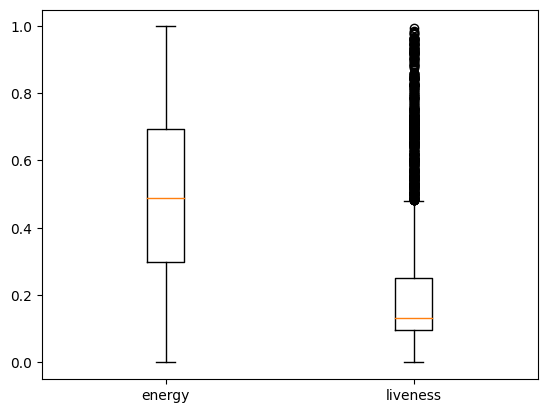

In [55]:
# To be completed
plt.boxplot(spotify_df[['energy', 'liveness']], labels=['energy', 'liveness'])

## Q: Missing values 
How many `nan` values are there in each column?

In [56]:
print('the number of rows with missing values in columns:')
for x in spotify_df.columns:
    print ("{:<20} {:<10}".format(x, spotify_df[spotify_df[x].isna()==True].shape[0]))

the number of rows with missing values in columns:
track_id             0         
disc_number          0         
duration_ms          0         
explicit             0         
track_name           0         
track_name_farsi     10020     
artist_name          0         
artist_name_farsi    0         
popularity           9701      
track_number         0         
album_href           9701      
album_id             0         
album_name           0         
album_release_date   0         
album_total_tracks   9701      
album_release_year   0         
track_href           0         
danceability         0         
energy               0         
key                  0         
loudness             0         
mode                 0         
speechiness          0         
acousticness         0         
instrumentalness     0         
liveness             0         
valence              0         
tempo                0         
time_signature       0         
key_name             

# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [57]:
# To be completed
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_none = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value= 'None')

spotify_df[['track_id', 'explicit','track_name_farsi','artist_name','artist_name_farsi','album_release_date','album_href','album_id','album_name','track_href','key_name','mode_name','key_mode']] = imp_none.fit_transform(spotify_df[['track_id', 'explicit','track_name_farsi','artist_name','artist_name_farsi','album_release_date','album_href','album_id','album_name','track_href','key_name','mode_name','key_mode']])
spotify_df[['disc_number','duration_ms','track_number','album_release_year','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','popularity']] = imp_mean.fit_transform(spotify_df[['disc_number','duration_ms','track_number','album_release_year','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature', 'popularity']])


mean was chosen because mean doesn't change the average and the variance of the model

# Determine your desired features here

In [58]:
music_feature_cols = ['duration_ms', 'explicit','energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'
    # To be completed
]

In [59]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,446880.0,False,0.390,0.0,-7.170,0.0,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3.0,Salar Aghili
1,851920.0,False,0.146,5.0,-10.008,1.0,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4.0,Salar Aghili
2,293160.0,False,0.453,5.0,-5.392,0.0,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5.0,Salar Aghili
3,648720.0,False,0.138,2.0,-12.287,0.0,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5.0,Salar Aghili
4,273480.0,False,0.443,0.0,-5.702,0.0,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1.0,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,397505.0,False,0.499,4.0,-10.805,0.0,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5.0,Shahram Nazeri
10628,3522173.0,False,0.163,5.0,-17.538,0.0,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3.0,Shahram Nazeri
10629,3402706.0,False,0.218,8.0,-15.865,1.0,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4.0,Shahram Nazeri
10630,3342733.0,False,0.304,8.0,-13.286,1.0,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3.0,Shahram Nazeri


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

for preprocessing the data I encoded the 'explicit' and 'artist_name' values then i nomralized all the numerical features except the two features I mentioned earlier.

In [60]:
label = LabelEncoder()
label_explicit= ['False', 'True']
label.fit(label_explicit)
tracks_feature_df['explicit'] = label.transform(tracks_feature_df['explicit'])
label_name=tracks_feature_df['artist_name'].unique()
label.fit(label_name)
tracks_feature_df['artist_name'] = label.transform(tracks_feature_df['artist_name'])
scaler = StandardScaler()
tracks_feature_df[['duration_ms', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']] = scaler.fit_transform(tracks_feature_df[['duration_ms', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']])
tracks_feature_df.head()

,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,0.932542,0,-0.440144,0.0,0.629863,0.0,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,3.0,58
1,3.321961,0,-1.449424,5.0,0.013646,1.0,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,4.0,58
2,0.025714,0,-0.179551,5.0,1.015921,0.0,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,5.0,58
3,2.123240,0,-1.482515,2.0,-0.481195,0.0,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,5.0,58
4,-0.090383,0,-0.220915,0.0,0.948610,0.0,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,1.0,58


In [61]:
label = LabelEncoder()
label_explicit= ['False', 'True']
label.fit(label_explicit)
spotify_df['explicit'] = label.transform(spotify_df['explicit'])
scaler = StandardScaler()
spotify_df[['duration_ms', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']] = scaler.fit_transform(spotify_df[['duration_ms', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']])

## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


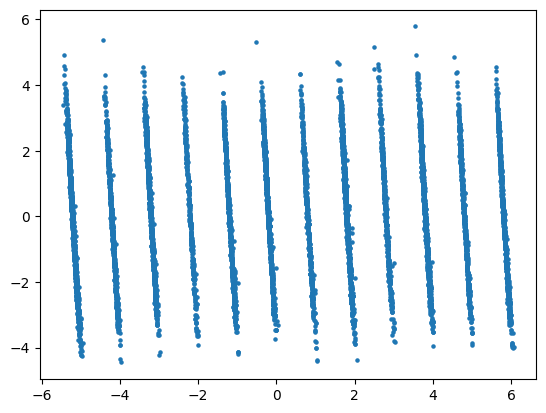

In [62]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)

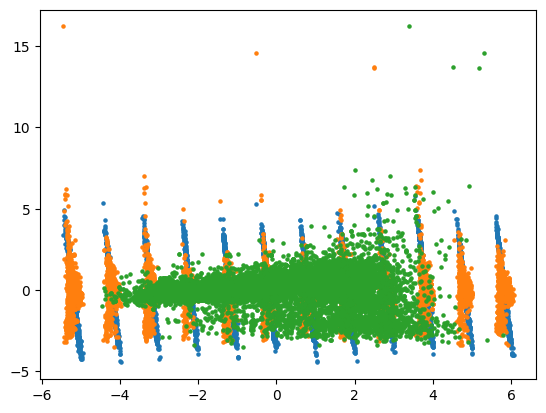

In [63]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [64]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

in order to find the best features for regression 'artist_name' values has been encoded to be used in generating it's correlation with 'popularity'. for finding the appropriate features the features which have a higher correlation than 0.42 have been chosen for the regression dataset

In [105]:
label = LabelEncoder()
df = spotify_df.copy()
label_name=df['artist_name'].unique()
label.fit(label_name)
df['artist_name'] = label.transform(df['artist_name'])
cor_reg = df.corr()['popularity'].sort_values(ascending=False).drop(['popularity'])
regression_features = list(cor_reg[cor_reg > 0.042].index)
y=df.loc[:,'popularity'].values
x=df.loc[:, regression_features].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2335285057.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_reg = df.corr()['popularity'].sort_values(ascending=False).drop(['popularity'])


In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [106]:
regressor = LinearRegression(
    # pass parameters here
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

19.570120621053995
[ 0.39455399 -0.16625946  0.56255013  0.0070911 ]


## Evaluate Regression Algorithm

In [107]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.022403
1,20.113856,20.548406
2,20.113856,20.542212
3,20.113856,20.096450
4,20.113856,19.924643
...,...,...
3185,20.113856,20.272078
3186,12.000000,20.269166
3187,20.113856,19.578763
3188,20.113856,20.071609


In [108]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9612008160645353
Mean Squared Error: 8.799603110000412
Root Mean Squared Error: 2.966412498288195


# Classification

## Prepare Labels

In [69]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

in order to create the ideal database for this task first I changed the 'label_album' unique inputs to numerical values to use this feature for finding the database's correlation with 'artist_name'. then I used the features that have positive correlation with 'artist_name' to find the columns of my features.

In [70]:
label_album=df['album_name'].unique()
label.fit(label_album)
df['album_name'] = label.transform(df['album_name'])
cor = df.corr()['artist_name'].sort_values(ascending=False).drop(['artist_name', 'popularity'])
music_feature_cols = list(cor[cor>-0.0001].index)
tracks_feature_df = df[music_feature_cols + ['artist_name']].dropna()
def is_sonnati(x):
    if x in sonnati_artists:
        return 1
    return 0
tracks_feature_df['is_sonnati'] = spotify_df['artist_name'].apply(is_sonnati)
tracks_feature_df = tracks_feature_df.drop(columns=['artist_name'])
tracks_feature_df.head()

C:\Users\dibah\AppData\Local\Temp\ipykernel_6368\2896577139.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()['artist_name'].sort_values(ascending=False).drop(['artist_name', 'popularity'])


,album_name,track_number,disc_number,instrumentalness,album_total_tracks,mode,tempo,key,danceability,time_signature,is_sonnati
11,1413,7.0,1.0,-0.435506,9.0,0.0,-2.390363,5.0,0.355,4.0,1
56,59,14.0,1.0,-0.448170,18.0,1.0,-1.442098,7.0,0.351,3.0,1
115,1822,1.0,1.0,-0.282127,8.0,0.0,-1.320108,0.0,0.587,3.0,1
123,1708,1.0,1.0,-0.448118,9.0,0.0,0.831194,2.0,0.569,3.0,1
159,702,1.0,1.0,-0.448122,7.0,0.0,1.638159,9.0,0.322,3.0,1


## Create Classification Dataset

In [71]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati']).values
y = tracks_feature_df['is_sonnati'].values

In [72]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(931, 11)
y.shape=(931,)


In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [74]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

for choosing the best classification model i tried all the classifiers and random forest proved to have a better F1 score

In [78]:

dataset = (x, y)
pprint(fit_and_eval(RandomForestClassifier(criterion='log_loss'), dataset))

{'acc': 0.9071428571428571,
 'confusion': array([[185,   7],
       [ 19,  69]], dtype=int64),
 'f1': 0.8414634146341463,
 'precision': 0.9078947368421053,
 'recall': 0.7840909090909091}


In [76]:
# autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
